<a href="https://colab.research.google.com/github/garylau1/model_training/blob/main/Analysis_of_the_Student's_performance_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Our purpose and the goal to the analysis :

#### Analysis of the Student's performance Dataset

In this Portfolio task,we analysis a dataset which is obtained in a survey of the students in a portuguese course of a secondary school.It contained some social, gender,final grade and study information about students.

Our highest goal and the purpose of this task is to build a model to predict students final grades using other features.To build a simple model for analysis,we can try to make a new column called "final result" of our data such that all results of G3 <=11 to be 0 and all results of G3 > 11 to be 1.

In this task we would use three prediction techniques(KNN model,logistic model and  multinomial Naive Bayes) to compare their performances.




The data is from a website called Kaggle and I download the dataset as CSV file named 'student-mat.csv'.The The header of the csv file is shown below.


| school | sex | age | address | famsize	| Pstatus | Medu | Fedu | Mjob	| Fjob	| reason | guardian | traveltime | studytime | 	failures | schoolsup | famsup | paid | activities | nursery | higher | internet | romantic | famrel | freetime | goout | Dalc | Walc | health | absences | G1 | G2 | G3 |

And we have the source of our data:
https://www.kaggle.com/datasets/uciml/student-alcohol-consumption/



#### Description of Fields

In this part we introduce the content of our dataset.


Attributes for both student-mat.csv (Math course) datasets:

school - student's school (binary: 'GP' - Gabriel Pereira or 'MS' - Mousinho da Silveira)

sex - student's sex (binary: 'F' - female or 'M' - male)

age - student's age (numeric: from 15 to 22)

address - student's home address type (binary: 'U' - urban or 'R' - rural)

famsize - family size (binary: 'LE3' - less or equal to 3 or 'GT3' - greater than 3)

Pstatus - parent's cohabitation status (binary: 'T' - living together or 'A' - apart)

Medu - mother's education (numeric: 0 - none, 1 - primary education (4th grade), 2 – 5th to 9th grade, 3 – secondary education or 4 – higher education)

Fedu - father's education (numeric: 0 - none, 1 - primary education (4th grade), 2 – 5th to 9th grade, 3 – secondary education or 4 – higher education)

Mjob - mother's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other')

Fjob - father's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other')

reason - reason to choose this school (nominal: close to 'home', school 'reputation', 'course' preference or 'other')

guardian - student's guardian (nominal: 'mother', 'father' or 'other')

traveltime - home to school travel time (numeric: 1 - <15 min., 2 - 15 to 30 min., 3 - 30 min. to 1 hour, or 4 - >1 hour)

studytime - weekly study time (numeric: 1 - <2 hours, 2 - 2 to 5 hours, 3 - 5 to 10 hours, or 4 - >10 hours)

failures - number of past class failures (numeric: n if 1<=n<3, else 4)

schoolsup - extra educational support (binary: yes or no)

famsup - family educational support (binary: yes or no)

paid - extra paid classes within the course subject (Portuguese) (binary: yes or no)

activities - extra-curricular activities (binary: yes or no)

nursery - attended nursery school (binary: yes or no)

higher - wants to take higher education (binary: yes or no)

internet - Internet access at home (binary: yes or no)

romantic - with a romantic relationship (binary: yes or no)

famrel - quality of family relationships (numeric: from 1 - very bad to 5 - excellent)

freetime - free time after school (numeric: from 1 - very low to 5 - very high)

goout - going out with friends (numeric: from 1 - very low to 5 - very high)

Dalc - workday alcohol consumption (numeric: from 1 - very low to 5 - very high)

Walc - weekend alcohol consumption (numeric: from 1 - very low to 5 - very high)

health - current health status (numeric: from 1 - very bad to 5 - very good)

absences - number of school absences (numeric: from 0 to 93)

These grades are related with the portuguese :


G1 - first period grade (numeric: from 0 to 20)

G2 - second period grade (numeric: from 0 to 20)

G3 - final grade (numeric: from 0 to 20, output target)


reference:
https://www.kaggle.com/datasets/uciml/student-alcohol-consumption/

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import r2_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.feature_selection import RFE
import warnings
warnings.filterwarnings("ignore")


from sklearn.preprocessing import OrdinalEncoder

import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

import warnings
warnings.filterwarnings("ignore")

### PART 1
#### Explore and prepare the data.
#### For example, remove abnormal instanaces and replace missing values.

In [ ]:
#display the data
ourdata=pd.read_csv('student-por.csv')
ourdata.head(10)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13
5,GP,M,16,U,LE3,T,4,3,services,other,...,5,4,2,1,2,5,6,12,12,13
6,GP,M,16,U,LE3,T,2,2,other,other,...,4,4,4,1,1,3,0,13,12,13
7,GP,F,17,U,GT3,A,4,4,other,teacher,...,4,1,4,1,1,1,2,10,13,13
8,GP,M,15,U,LE3,A,3,2,services,other,...,4,2,2,1,1,1,0,15,16,17
9,GP,M,15,U,GT3,T,3,4,other,other,...,5,5,1,1,1,5,0,12,12,13


In [ ]:
#we can also describe the statistics of our data.
ourdata.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000
mean,16.744222,2.514638,2.306626,1.568567,1.930663,0.221880,3.930663,3.180277,3.184900,1.502311,2.280431,3.536210,3.659476,11.399076,11.570108,11.906009
std,1.218138,1.134552,1.099931,0.748660,0.829510,0.593235,0.955717,1.051093,1.175766,0.924834,1.284380,1.446259,4.640759,2.745265,2.913639,3.230656
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,16.000000,2.000000,1.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,2.000000,0.000000,10.000000,10.000000,10.000000
50%,17.000000,2.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,2.000000,11.000000,11.000000,12.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,6.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,32.000000,19.000000,19.000000,19.000000


In [ ]:
#we can also describe the co-relation between each features and our final grade G3.

ourdata.corr().G3

age          -0.106505
Medu          0.240151
Fedu          0.211800
traveltime   -0.127173
studytime     0.249789
failures     -0.393316
famrel        0.063361
freetime     -0.122705
goout        -0.087641
Dalc         -0.204719
Walc         -0.176619
health       -0.098851
absences     -0.091379
G1            0.826387
G2            0.918548
G3            1.000000
Name: G3, dtype: float64

In [ ]:
#from the portfolio 1 we know we can use info() to explore the data types of each column

ourdata.info()

#We can see that columns 2,6,7.... are intregers and columns 0,1,3,4... are not intregers

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 649 entries, 0 to 648
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      649 non-null    object
 1   sex         649 non-null    object
 2   age         649 non-null    int64 
 3   address     649 non-null    object
 4   famsize     649 non-null    object
 5   Pstatus     649 non-null    object
 6   Medu        649 non-null    int64 
 7   Fedu        649 non-null    int64 
 8   Mjob        649 non-null    object
 9   Fjob        649 non-null    object
 10  reason      649 non-null    object
 11  guardian    649 non-null    object
 12  traveltime  649 non-null    int64 
 13  studytime   649 non-null    int64 
 14  failures    649 non-null    int64 
 15  schoolsup   649 non-null    object
 16  famsup      649 non-null    object
 17  paid        649 non-null    object
 18  activities  649 non-null    object
 19  nursery     649 non-null    object
 20  higher    

In [ ]:
#print the total shape of the data
ourdata.shape

(649, 33)

In [ ]:
#we can see there is no missing values so we dont need to remove anything.

nan_count = ourdata.isna().sum()

print(nan_count)

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64


#### Some extra descriptive statistics

We have our dataset without missing values and we can explore futher into the data with some extra univariate analysis:

for example we want to know the total unique elements of age and famsize(family size) and Fjob(father's job).


In [ ]:
# We also can provide the data summarization as below:


age_array = ourdata['age'].unique()
print('the list of unique age is ', age_array)

famsize_array = ourdata['famsize'].unique()
print('the list of unique family size is ',famsize_array)


Fjob_array = ourdata['Fjob'].unique()
print('the list of  father job is ',Fjob_array)




the list of unique age is  [18 17 15 16 19 22 20 21]
the list of unique family size is  ['GT3' 'LE3']
the list of  father job is  ['teacher' 'other' 'services' 'health' 'at_home']


We can also group the students by genders with final grade and see the numbers between them:


In [ ]:
gender_item_num = ourdata.groupby(['sex'])['G3'].count().reset_index(name='count')
gender_item_num.head()

,sex,count
0,F,383
1,M,266


We can also group students by their health and freetime with final grade and to see the numbers of data:

In [ ]:



health_item_num = ourdata.groupby(['health',"freetime"])['G3'].count().reset_index(name='count')
health_item_num.head()

,health,freetime,count
0,1,1,11
1,1,2,14
2,1,3,31
3,1,4,22
4,1,5,12


### To build a simple model,we can try to make a new column final_result to store our data in G3 such that all results of G3 less or equal to 11 to be 0 and all results of G3 greater than 11 to be 1.

In [ ]:
##Here is our way to create a target feature called "final_result"

ourdata=pd.read_csv('student-por.csv')
ourdata_converted=ourdata.G3.isin([x for x in range(12,21)])
ourdata.insert(33, "final_result", ourdata_converted, True)
ourdata["final_result"] = ourdata["final_result"].astype(int)

ourdata.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,final_result
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,3,4,1,1,3,4,0,11,11,0
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,3,3,1,1,3,2,9,11,11,0
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,3,2,2,3,3,6,12,13,12,1
3,GP,F,15,U,GT3,T,4,2,health,services,...,2,2,1,1,5,0,14,14,14,1
4,GP,F,16,U,GT3,T,3,3,other,other,...,3,2,1,2,5,0,11,13,13,1


#### We can explore some of the variable by plotting the box plot or using histrogram to find our the corelation between G3(final grade) and some of the features:


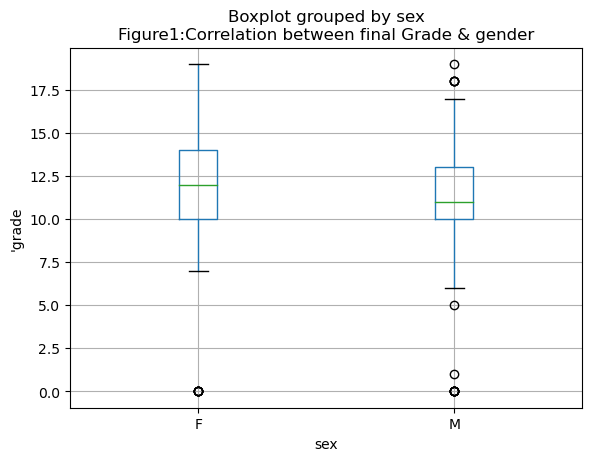

In [ ]:
import matplotlib.pyplot as plt

#use the boxplot function to plot figures for comparison for G3 VS gender
boxplot = ourdata.boxplot(column=['G3' ], by = ['sex'])  #define the size and the propeties of the boxplot
boxplot.plot()
boxplot.set_xlabel('sex') #set x label
boxplot.set_ylabel("'grade") #set y label

plt.title("Figure1:Correlation between final Grade & gender")  #set title


plt.show()

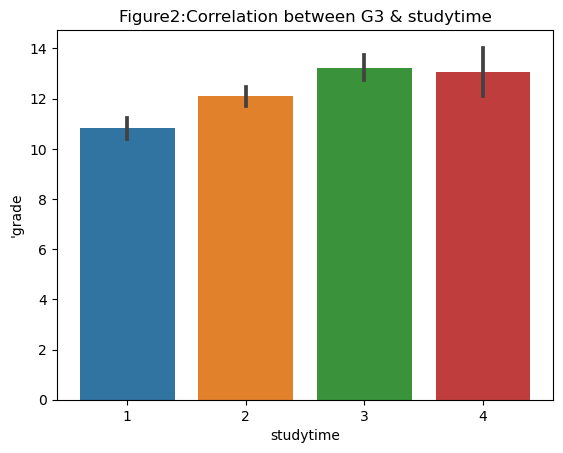

In [ ]:
import matplotlib.pyplot as plt

#use the barplot function to plot figures for comparison for G3 VS studytimes
boxplot =sns.barplot(ourdata, x='studytime', y='G3')  #define the size and the propeties of the boxplot
boxplot.plot()
boxplot.set_xlabel('studytime') #set x label
boxplot.set_ylabel("'grade") #set y label

plt.title("Figure2:Correlation between G3 & studytime")  #set title


plt.show()

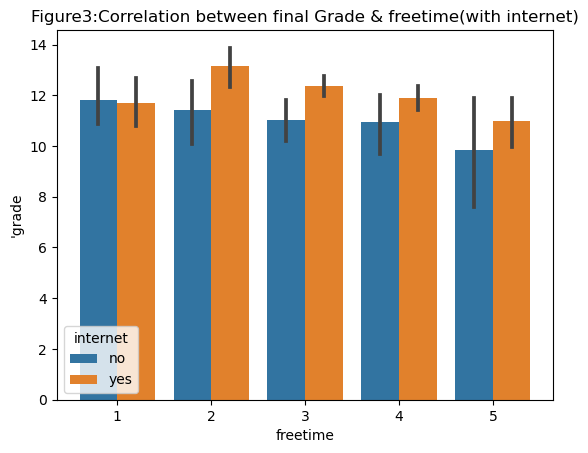

In [ ]:
import matplotlib.pyplot as plt

#use the barplot function to plot figures for comparison for G3 and freetime(and internet)


boxplot=sns.barplot(ourdata, x="freetime", y="G3", hue="internet")
boxplot.plot()
boxplot.set_xlabel('freetime') #set x label
boxplot.set_ylabel("'grade") #set y label
 #import the library matplotlib
plt.title("Figure3:Correlation between final Grade & freetime(with internet)")  #set title


plt.show()

### Comment:

From the first graph we can see females performs better then males in the courses since the average G3 of girls in the boxplot is higher than boys.

In the second graph,we can see that studytime also play significant effect since the averages G3 of studytime 3 and 4 are much better than 1 or 2.
Although the G3 of studytime=4 is slightly less than G3 of studytime=3,this seems to have no significant difference(just little bit in the graph).

In our third graph,it seems that the students who have internet performs better then the one with the students without internet.Because we observe that students with freetimes 2,3,4 and 5 have higher grades with internet except the students with freetime=1. We can also see the students having internet with freetime=2 seems to outperform students with other freetime in final grade (in average) and the students having internet with freetime=3 (in average) are the second-best.



#### We can also plot the histogram with some datas to explore the outlier:

Text(0.5, 1.0, 'Figure 4: Our histogram of absences')

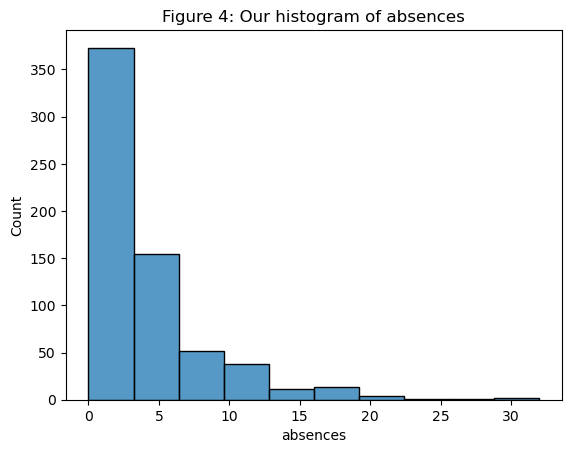

In [ ]:
import seaborn as sns

sns.histplot(data=ourdata, x='absences', bins=10)

plt.title("Figure 4: Our histogram of absences")

Text(0.5, 1.0, 'Figure 5: Our histogram of ages of students')

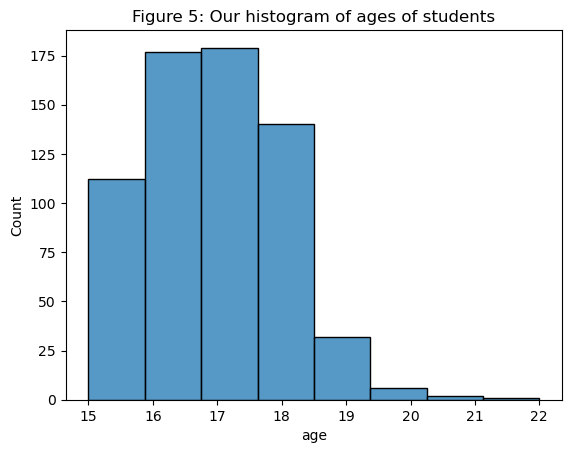

In [ ]:
import seaborn as sns

sns.histplot(data=ourdata, x='age', bins=8)

plt.title("Figure 5: Our histogram of ages of students")

### To remove the outliers,we can actually set up these rules to do it :
From the prevous two graphs we can see that
(1) A student who is absent than more than 30 days seems to be very uncommon and it is not the area of our interest,so we decide to remove these data or to seperate to analysis it.

(2) A student who is 22 age or more seems to be too old to be a high school student in average (from the previous histrogram ,we can see that the number of students with age 22 or higher are very few)and we might need to collect more data to do analysis which is not our interest.Thefore,we decide to remove and seperate it.



In [ ]:
#We can also print out the data where age is equal to greater than 22.
ourdata[ourdata.age>=22]


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,final_result
279,GP,M,22,U,GT3,T,3,1,services,services,...,4,5,5,5,1,12,7,8,5,0


In [ ]:
#We can also print out the data where absenses are greater than 30 days

ourdata[ourdata.absences>30]

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,final_result
197,GP,F,17,U,LE3,T,3,3,other,other,...,3,3,2,3,1,32,14,13,14,1


### Now,we can remove outliers and  add a column final_result as we describe before:

In [ ]:

# To set up the rule we can remove the outliers

ourdata=pd.read_csv('student-por.csv')

a=ourdata.G3.isin([x for x in range(12,21)])
ourdata.insert(33, "final_result", a, True)
ourdata["final_result"] = ourdata["final_result"].astype(int)

# set all final result to be 0 if the value of G3<12,otherwise set the value to be 1.


ourdata_new=ourdata[ourdata.age<=21]
ourdata_new=ourdata_new[ourdata_new.absences<=30]

#after removing the outlier,we store our cleaned dataframe into variable ourdata_new.
ourdata_new

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,final_result
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,3,4,1,1,3,4,0,11,11,0
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,3,3,1,1,3,2,9,11,11,0
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,3,2,2,3,3,6,12,13,12,1
3,GP,F,15,U,GT3,T,4,2,health,services,...,2,2,1,1,5,0,14,14,14,1
4,GP,F,16,U,GT3,T,3,3,other,other,...,3,2,1,2,5,0,11,13,13,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,MS,F,19,R,GT3,T,2,3,services,other,...,4,2,1,2,5,4,10,11,10,0
645,MS,F,18,U,LE3,T,3,1,teacher,services,...,3,4,1,1,1,4,15,15,16,1
646,MS,F,18,U,GT3,T,1,1,other,other,...,1,1,1,1,5,6,11,12,9,0
647,MS,M,17,U,LE3,T,3,1,services,services,...,4,5,3,4,2,6,10,10,10,0


#### After removing the outliers,we can print out the shape of our new dataframe:

In [ ]:
ourdata_new.shape

(647, 34)

### After removeing the outliers,we can convert the object features into digit features by using an encoder:

In [ ]:
#Convert object features into digit features by using an encoder:
ord_enc = OrdinalEncoder()

ourdata_new["address_code"] = ord_enc.fit_transform(ourdata_new[["address"]])
ourdata_new["famsize_code"]=ord_enc.fit_transform(ourdata_new[["famsize"]])
ourdata_new["school_code"]=ord_enc.fit_transform(ourdata_new[["school"]])
ourdata_new["Mjob_code"]=ord_enc.fit_transform(ourdata_new[["Mjob"]])
ourdata_new["Fjob_code"]=ord_enc.fit_transform(ourdata_new[["Fjob"]])
ourdata_new["reason_code"]=ord_enc.fit_transform(ourdata_new[["reason"]])
ourdata_new["guardian_code"]=ord_enc.fit_transform(ourdata_new[["guardian"]])
ourdata_new["Pstatus_code"]=ord_enc.fit_transform(ourdata_new[["Pstatus"]])


ourdata_new.schoolsup.replace(('yes', 'no'), (1, 0), inplace=True)
ourdata_new.famsup.replace(('yes', 'no'), (1, 0), inplace=True)
ourdata_new.paid.replace(('yes', 'no'), (1, 0), inplace=True)
ourdata_new.sex.replace(('M', 'F'), (1, 0), inplace=True)
ourdata_new.activities.replace(('yes', 'no'), (1, 0), inplace=True)
ourdata_new.nursery.replace(('yes', 'no'), (1, 0), inplace=True)
ourdata_new.higher.replace(('yes', 'no'), (1, 0), inplace=True)
ourdata_new.internet.replace(('yes', 'no'), (1, 0), inplace=True)
ourdata_new.romantic.replace(('yes', 'no'), (1, 0), inplace=True)

#next step we need to drop those category variables with object features and rename those digit features'ones
ourdata_new=ourdata_new.drop(['address', 'famsize','school',"Mjob","Fjob","reason","guardian",'Pstatus',"G3"],axis=1)


ourdata_new

,sex,age,Medu,Fedu,traveltime,studytime,failures,schoolsup,famsup,paid,...,G2,final_result,address_code,famsize_code,school_code,Mjob_code,Fjob_code,reason_code,guardian_code,Pstatus_code
0,0,18,4,4,2,2,0,1,0,0,...,11,0,1.0,0.0,0.0,0.0,4.0,0.0,1.0,0.0
1,0,17,1,1,1,2,0,0,1,0,...,11,0,1.0,0.0,0.0,0.0,2.0,0.0,0.0,1.0
2,0,15,1,1,1,2,0,1,0,0,...,13,1,1.0,1.0,0.0,0.0,2.0,2.0,1.0,1.0
3,0,15,4,2,1,3,0,0,1,0,...,14,1,1.0,0.0,0.0,1.0,3.0,1.0,1.0,1.0
4,0,16,3,3,1,2,0,0,1,0,...,13,1,1.0,0.0,0.0,2.0,2.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,0,19,2,3,1,3,1,0,0,0,...,11,0,0.0,0.0,1.0,3.0,2.0,0.0,1.0,1.0
645,0,18,3,1,1,2,0,0,1,0,...,15,1,1.0,1.0,1.0,4.0,3.0,0.0,1.0,1.0
646,0,18,1,1,2,2,0,0,0,0,...,12,0,1.0,0.0,1.0,2.0,2.0,0.0,1.0,1.0
647,1,17,3,1,2,1,0,0,0,0,...,10,0,1.0,1.0,1.0,3.0,3.0,0.0,1.0,1.0


#### We can explore further of our data by finding the relationship between differet features and rating after converting all features into numerical type:

In [ ]:
##Let's check the corelation
ourdata_new.corr().final_result

sex             -0.133145
age             -0.093621
Medu             0.261965
Fedu             0.229151
traveltime      -0.185915
studytime        0.237677
failures        -0.353884
schoolsup       -0.055279
famsup           0.019607
paid            -0.011936
activities       0.121517
nursery          0.063306
higher           0.318039
internet         0.153762
romantic        -0.045727
famrel           0.075348
freetime        -0.112649
goout           -0.103673
Dalc            -0.203767
Walc            -0.168124
health          -0.085604
absences        -0.172439
G1               0.727958
G2               0.744014
final_result     1.000000
address_code     0.172789
famsize_code    -0.002972
school_code     -0.267900
Mjob_code        0.215754
Fjob_code        0.076207
reason_code      0.126194
guardian_code   -0.095052
Pstatus_code    -0.000888
Name: final_result, dtype: float64

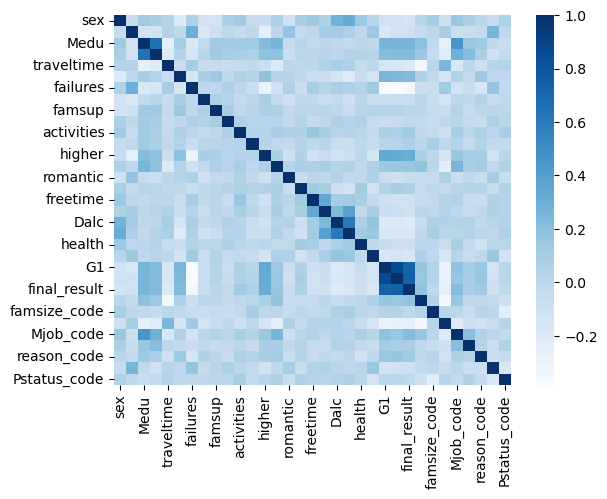

In [ ]:
# We can also plot the graph:

sns.heatmap(ourdata_new.corr(), cmap='Blues', annot=False)
plt.show()

#### Comment:
From the avobe code we can see that G1 and G2 have the the two most corelated relationship { (0.744,0.728}) with the final_result.
Also we can see that parent's cohabitation status (-0.000888) and family size (-0.002972) have the least two corelated relationship with the final_result.
 Also we can see the class failture and the higher(the students who wants to take higher education) have some corelated relationship (the asboluate values are higher than 0.31)with the final_result as well.

### Part(2) Logistic model:

In this part we would use logistic model to compare the accuracy.

In [ ]:
#Split the dataset and train a logistic regression model to
#predict 'rating' based on other features. Evaluate the accuracy of your model.
# Split the data into training(90%) and testing data (10%).
from sklearn.linear_model import LogisticRegression
train, test = train_test_split(ourdata_new, test_size=0.10, random_state=143)
print("train.shape:",train.shape)
print("test.shape:",test.shape)

X_train = train.drop(["final_result"], axis=1)
y_train = train["final_result"]
X_test = test.drop(["final_result"], axis=1)
y_test = test["final_result"]



#We can print out the shape of our training set and testing set as below

train.shape: (582, 33)
test.shape: (65, 33)


In [ ]:
#Next we can use RFE object to explore the best features we can use in this model
# creating RFE object

# to increment number of features, one at each time
acc_scores = []
for i in range(1,33):
    clf = LogisticRegression()
    rfe = RFE(estimator=clf, n_features_to_select=i)
    # training model
    rfe.fit(X_train, y_train)
    # predicting on test set
    y_pred = rfe.predict(X_test)
    acc_score = accuracy_score(y_test, y_pred)
    # print this
    print("Acc on test set using", i, "features: ", acc_score)
    # append to the list
    acc_scores.append(acc_score)

Acc on test set using 1 features:  0.9384615384615385
Acc on test set using 2 features:  0.9384615384615385
Acc on test set using 3 features:  0.9384615384615385
Acc on test set using 4 features:  0.9384615384615385
Acc on test set using 5 features:  0.9384615384615385
Acc on test set using 6 features:  0.9076923076923077
Acc on test set using 7 features:  0.9076923076923077
Acc on test set using 8 features:  0.9076923076923077
Acc on test set using 9 features:  0.9076923076923077
Acc on test set using 10 features:  0.9230769230769231
Acc on test set using 11 features:  0.9230769230769231
Acc on test set using 12 features:  0.9384615384615385
Acc on test set using 13 features:  0.9384615384615385
Acc on test set using 14 features:  0.9230769230769231
Acc on test set using 15 features:  0.9230769230769231
Acc on test set using 16 features:  0.9230769230769231
Acc on test set using 17 features:  0.9230769230769231
Acc on test set using 18 features:  0.9384615384615385
Acc on test set usi

In concludsion We can use the best 5 features to get the accuracy and the best accuracy is 0.9384615384615385.We can see the performanance has no much difference if we use all features which means those less important features might not affect the result much.


In [ ]:
# summarize all features
#We can also store our columns with the ascending ranking orders into the dictionary columns_by_ranking
lr_model = LogisticRegression()
rfe = RFE(estimator=lr_model, n_features_to_select=5, step=1)
rfe.fit(X_train, y_train)

columns_by_ranking = {};

for i in range(X_train.shape[1]):
    print('Column: %d, Selected %s, Rank: %.3f' % (i, rfe.support_[i], rfe.ranking_[i]))
    columns_by_ranking[i] = rfe.ranking_[i]


Column: 0, Selected True, Rank: 1.000
Column: 1, Selected False, Rank: 3.000
Column: 2, Selected False, Rank: 17.000
Column: 3, Selected False, Rank: 14.000
Column: 4, Selected False, Rank: 11.000
Column: 5, Selected False, Rank: 8.000
Column: 6, Selected True, Rank: 1.000
Column: 7, Selected False, Rank: 27.000
Column: 8, Selected False, Rank: 28.000
Column: 9, Selected False, Rank: 15.000
Column: 10, Selected False, Rank: 7.000
Column: 11, Selected False, Rank: 5.000
Column: 12, Selected False, Rank: 16.000
Column: 13, Selected True, Rank: 1.000
Column: 14, Selected False, Rank: 13.000
Column: 15, Selected False, Rank: 10.000
Column: 16, Selected False, Rank: 12.000
Column: 17, Selected False, Rank: 25.000
Column: 18, Selected False, Rank: 18.000
Column: 19, Selected False, Rank: 21.000
Column: 20, Selected False, Rank: 20.000
Column: 21, Selected False, Rank: 22.000
Column: 22, Selected False, Rank: 2.000
Column: 23, Selected True, Rank: 1.000
Column: 24, Selected False, Rank: 9.000

## To see whether the logistic regression performing sccuessfully,we can make a base case with no-training.This means we predict all result to be 1 and we can see the performanace.



In [ ]:
##print out the accuracy if we choose all rating to be 1 (without training).

accuracy_without_training=len(ourdata_new[ourdata_new.final_result==1])/len(ourdata_new)

print ("accuracy_without_training :",accuracy_without_training)

accuracy_without_training : 0.5363214837712519


### Comment :

It seem that we get around 0.54 if we choose all rating to be 1,this implied our data of 1 and 0 are balance because the number of 1 and 0 in our final result are approxmately equal.We obtain a accuracy with 0.9384615384615385 in Logistic model which looks better than the non-training baseline result.

### We can also plot the accuracy score on test set VS No. of features:

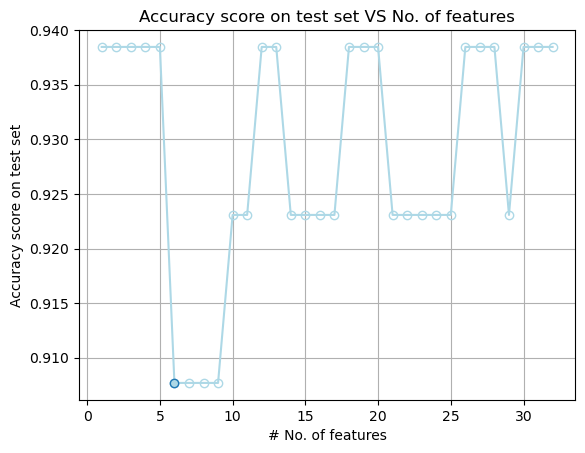

In [ ]:
# Estimating accuracy score on test set using RFE by using different number of features
estimator = LogisticRegression()
acc_scores = []
for i in range(1, 33):
    selector = RFE(estimator,n_features_to_select=i)
    selector = selector.fit(X_train, y_train)
    supp = selector.get_support()

    predicted = selector.predict(X_test)
    acc_score = accuracy_score(y_test, predicted)
    acc_scores.append(acc_score)

best = 1
for item in acc_scores:
    if item < acc_scores[best - 1]:
        best = acc_scores.index(item) + 1

plt.grid()
plt.xlabel('# No. of features')
plt.ylabel('Accuracy score on test set')
plt.title('Accuracy score on test set VS No. of features')
plt.plot(range(1, 33), acc_scores, marker = 'o', color = 'lightblue', markeredgewidth = 1 ,markeredgecolor = 'lightblue', markerfacecolor = 'None')
plt.plot(best, acc_scores[best-1], marker = 'o', markerfacecolor = 'lightblue')

### Part(3) KNN model:

We can use KNN model which is a techqiue we have learnt after week 7.

Based on the best 5 features we obtain in the previous task,we can see if we can do it better.

In [ ]:
## We only need the best 5 features from all features and we print out the index of features:
#We store the data into a dictionary dict we have done before and convert into list called column_by_ranking
#and store the best five column index in the list called column_by_ranking_5_features.

columns_by_ranking = sorted(columns_by_ranking.items(), key=lambda x:x[1])
converted_columns_by_ranking = dict(columns_by_ranking)
column_by_ranking=list(converted_columns_by_ranking.keys())
column_by_ranking_5_features=column_by_ranking[0:5]
our_data_select=ourdata_new.drop(["final_result"],axis=1)
column_by_ranking_5_features


[0, 6, 13, 23, 31]

In [ ]:
## Next we consider the whole data to do KNN validation
our_data_select=ourdata_new.drop(["final_result"],axis=1)
# X is out chosen dataframe of the 5 important features
X=our_data_select.iloc[:, column_by_ranking_5_features]

y=ourdata_new.final_result

Next we can use hyper-parameter K in KNN with these 5 features to see the best accuracy and the best value.
Here we use 10 cross validation to perform our task:

In [ ]:
#Tune the hyper-parameter K in KNN to see how it influences the prediction performance
#Automatic model hyperparameter (algorithm parameter) tuning¶


# Define search space for parameters
parameter_grid = {'n_neighbors': range(1, 40)}

# Create the machine learning model
knn_clf = KNeighborsClassifier()
clf = GridSearchCV(knn_clf, parameter_grid, scoring='accuracy', cv=10)
clf.fit(X, y)

# Identify the best parameter(s)
print('Best K value: ', clf.best_params_['n_neighbors'])
print('The accuracy: ', clf.best_score_)

Best K value:  20
The accuracy:  0.9381009615384615


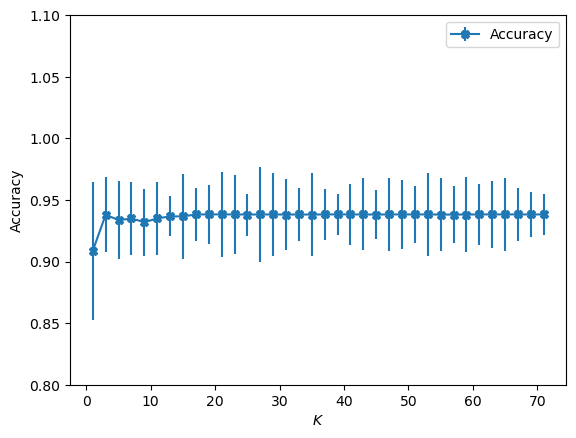

In [ ]:
#we can also do Manual tuning as well.
#Manual tuning with cross validation: We can plot the misclassification error versus


from sklearn.model_selection import cross_val_score, KFold
import matplotlib.pyplot as plt

cv_scores = []
cv_scores_std = []
k_range = range(1, 72, 2)
for i in k_range:
    clf = KNeighborsClassifier(n_neighbors = i)
    scores = cross_val_score(clf, X, y, scoring='accuracy', cv=KFold(n_splits=10, shuffle=True))
    cv_scores.append(scores.mean())
    cv_scores_std.append(scores.std())

# Plot the relationship
plt.errorbar(k_range, cv_scores, yerr=cv_scores_std, marker='X', label='Accuracy')
plt.ylim([0.8, 1.1])
plt.xlabel('$K$')
plt.ylabel('Accuracy')
plt.legend(loc='best')
plt.show()

####  Comment:

It looks like the accuracy is around between 0.9 and 0.98 with most k values.
It seems the accuracy less when k approches 0 because of the overfitting issures.



#### Compare our KNN result with other methods:
Comparing with the accuracy 0.9384615384615385 in logistic model,it seems we didnt get a better accuracy(0.9381009615384615) in KNN model.
Two models seems to have no much difference in terms of accuracy.

### Part(4) multinomial Naive Bayes:

We can also do multinomial Naive Bayes analysis which is very suitable for the data we have(they are not contionous type).

In [ ]:
from sklearn.naive_bayes import MultinomialNB



train, test = train_test_split(ourdata_new, test_size=0.10, random_state=143)
#We use the best five features we obtain before

X_train = train.iloc[:,column_by_ranking_5_features]
y_train = train["final_result"]
X_test = test.iloc[:,column_by_ranking_5_features]
y_test = test["final_result"]

print(train.shape)
print(test.shape)

clf_mnb=MultinomialNB(alpha=0)
clf_mnb.fit(X_train,y_train)




y_pred = clf_mnb.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy is: %.4f\n' % accuracy)

(582, 33)
(65, 33)
Accuracy is: 0.6769



In [ ]:
# Explore the learned model parameters (probabilities)
# Note that the probabilities are in the logorithmic form. Why? The log-sum-exp trick for underflow of probability products
print('Estimated probability of classess: \n', np.e**clf_mnb.class_log_prior_)
print('Estimated class-conditional probabilities for each feature: \n', np.e**clf_mnb.feature_log_prob_)

Estimated probability of classess: 
 [0.46391753 0.53608247]
Estimated class-conditional probabilities for each feature: 
 [[0.04088748 0.03835182 0.059271   0.78573693 0.07575277]
 [0.02065262 0.00185874 0.05349029 0.87381247 0.05018587]]


#### Comment:

Our accuracy in multinomial Naive Bayes doesnt look really good compared with the KNN or logistic model but it is still better than the no-training case.


#### PART(5): Comparison between Logistic model ,KNN model and Multinomial Naive Bayes :

Compare the prediction accuaracy between KNN clasifier (use the optimal K) and Multinomial Naive Bayes and Logistic model.Here we use 10-cross validation to report the accuracy mean and standard deviation.


We can determine which classifidation model is more accurate by using t-test to show if the difference is statistically significant.

In [ ]:
#Use the five best features again:
column_by_ranking_5_features=column_by_ranking[0:5]
our_data_select=ourdata_new.drop(["final_result"],axis=1)

X=our_data_select.iloc[:, column_by_ranking_5_features]

y=ourdata_new.final_result
#to create our features set X and the target feature set y

clf_log=LogisticRegression()
clf_gnb=MultinomialNB()
#Use our best k=20
clf_knn=KNeighborsClassifier(n_neighbors=20)

#print out the accuracy mean and standard deviation
scores=cross_val_score(clf_gnb,X,y,scoring="accuracy",cv=10)
print ('Multinomial Naive Bayes accuracy range: [%.4f, %.4f]; mean: %.4f; stf: %.4f\n'
% (scores.min(),scores.max(),scores.mean(),scores.std()))
scores_gnb=scores

scores=cross_val_score(clf_knn,X,y,scoring="accuracy",cv=10)
print ('KNN Classifier accuracy range: [%.4f, %.4f]; mean: %.4f; stf: %.4f\n'
% (scores.min(),scores.max(),scores.mean(),scores.std()))
scores_knn=scores

scores=cross_val_score(clf_log,X,y,scoring="accuracy",cv=10)
print ('Logistic Classifier accuracy range: [%.4f, %.4f]; mean: %.4f; stf: %.4f\n'
% (scores.min(),scores.max(),scores.mean(),scores.std()))
scores_log=scores






Multinomial Naive Bayes accuracy range: [0.6154, 0.8308]; mean: 0.7032; stf: 0.0608

KNN Classifier accuracy range: [0.9062, 0.9692]; mean: 0.9381; stf: 0.0221

Logistic Classifier accuracy range: [0.8615, 0.9692]; mean: 0.9289; stf: 0.0310



In [ ]:
# Compare the performace between KNN model and Multinomial Naive Bayes :

from scipy.stats import ttest_ind
t,p=ttest_ind(scores_gnb,scores_knn)
print ('t, p: %.4f, %.4f\n'% (t,p))

t, p: -10.8861, 0.0000



In [ ]:
# Compare the performace between Multinomial Naive Baye model and KNN model :

from scipy.stats import ttest_ind
t,p=ttest_ind(scores_log,scores_gnb)
print ('t, p: %.4f, %.4f\n'% (t,p))

t, p: 9.9101, 0.0000



In [ ]:
# Compare the performace between KNN model and logistic model :

from scipy.stats import ttest_ind
t,p=ttest_ind(scores_knn,scores_log)
print ('t, p: %.4f, %.4f\n'% (t,p))

t, p: 0.7276, 0.4762



### Comment on the t test :

Using statistical test we can see there is no much difference between KNN model and logistic model since the p value is very high (>0.05).
We can see that there is statistical difference between logistic model(or KNN model) and Multinomial Naive Bayes since the p value is less than 0.05.

#### We can also visulize our result of the average accuracy as analysed in part(5):

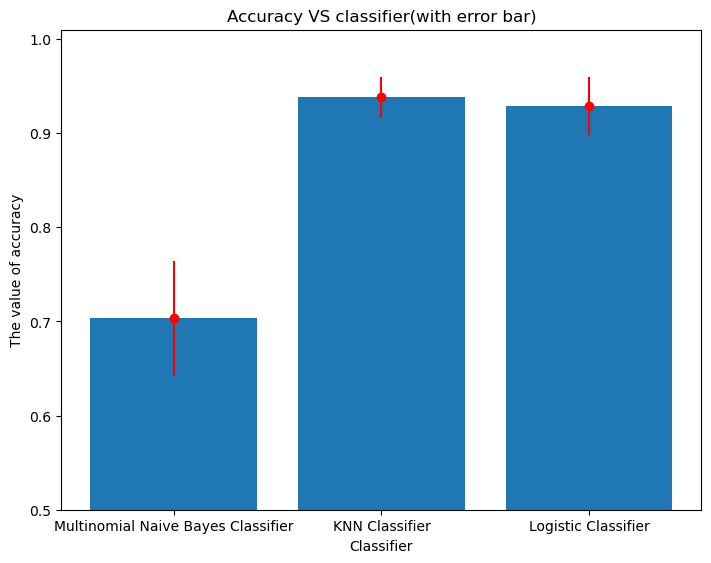

In [ ]:
#visulize the result of accuracy:

import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
langs = [ "Multinomial Naive Bayes Classifier","KNN Classifier",'Logistic Classifier']
students = [0.7032,0.9381,0.9289]
ax.bar(langs,students)


plt.title('Accuracy VS classifier(with error bar)')
plt.xlabel("Classifier")
plt.ylabel("The value of accuracy")

error_bar = [0.0608,0.0221,0.0310]

plt.errorbar(langs, students, yerr=error_bar, fmt="o", color="r")


plt.ylim([0.50, 1.01])
plt.show()

In [ ]:
### Comment: we can see that the accuracy between KNN and logistic model have not much difference but the
#accuracy of KNN/Logistic model outperforms the accuracy of the Multinomial Naive Bayes

### Part(6)  Dicussion and conclusion of the result:

In part(1) we can see that G1 and G2 have the the two most corelated relationship { (0.744,0.728}) with the final_result.
We can see that parent's cohabitation status (-0.000888) and family size (-0.002972) have the least two corelated relationship with the final_result.
we can also see the class failture and the higher(the students who wants to take higher education) have some corelated relationship (the asboluate values are higher than 0.31)with the final_result as well.

In part(2),We can see that the best five features (from RFE) to predict the final_result in our logistic model model is the sex,failures,internet,G2 and guardian.from the graph we plot in part (1) we can see girls performs better than boys in this course and we can see the students having internet performs better than the students without internet.(3)G2 is a best indicator since we can see the it has the strongest corelation between the G2 and final_result from part(1).Also faitures plays a significant roles as well.

We notice that the best 5 features we obtain from the Corr.() with the final_result are different from the best 5 features we obtain from RFE,the reason might be we use different metrics here and some of the features are not sensitive to the logistic model we need.



In part (2)(3)(4)(5), we can see that Three models (KNN,Multinomial Naive Bayes,Logistic) perform better than the one without training(accuracy around 0.53) which implied that both models can be used as prediction.




Using two metrics to compare different accuracies(the accuracy of the logistic model/Multinomial Naive Bayes without cross validation by splitting into test-train set and the accuracy of the logistic model/Multinomial Naive Bayes with cross-validation with the whole databset),we can see that KNN and logistic model ourperform Multinomial Naive Bayes model because both models have a average accuracy higher than 0.9 and the best Multinomial Naive Bayes is still lower than the minimum best accuracy of the KNN/logistic model.


Also it is hard to determine whether logistic model or KNN performs better or not and it seems there is no significance difference.For example the best value of KNN we obtain in part(3) is slightly less than the best value of the logistic model we obtain in part(2).And the average best value of KNN we obtain in part(5) is slightly higher than the best average value we obtain in part(5) by k-cross validation method.In both case we cannot see much difference.


After we have done a t test and we see that p value is 0.4762 between KNN and logistic model.We see that the p value is too much  here,which implied they dont have much differece in the performance.

However if we have done a t test between Multinomial Naive Bayes and KNN model/Logistic model,we can see that the p value is quiet small which implied there is statistical significance between these models.


#### In conclusion,KNN model and logistic model performs really well(the best accuracy in average is greater than 0.9) and the Multinomial Naive Bayes is not very good(best accuracy around 0.7) but still better than non-training guessing.
